# Scholastic Case Study

### Goal: Exploratory Data Analysis
- Characterize buildings that contribute to the most loss
- Summarize findings

### Resources
[Attrition Model](https://www.analyticsvidhya.com/blog/2021/11/employee-attrition-prediction-a-comprehensive-guide/)
<br> Scholastic Red = #e40404

### Setup

In [157]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [158]:
# Plotting specs
matplotlib.rcParams['figure.figsize'] = 12, 8
plt.rcParams['figure.dpi'] = 300
sns.set()

In [159]:
# Display entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Load Data

In [160]:
buildings = pd.read_csv('Data/buildings.csv')
clubs = pd.read_csv('Data/clubs_order.csv')
ed_rev = pd.read_csv('Data/ed_rev.csv')
mag_orders = pd.read_csv('Data/magazine_orders.ca

In [164]:
dfs = [buildings, clubs, ed_rev, mag_orders]

### Data at first glance

In [165]:
buildings.head()

,building_id,mailing_state,enrollment,b_indicator_charter,b_indicator_catholic,b_indicator_private,b_indicator_public,reading_performance_grd_3_pct,reading_performance_grd_4_pct,reading_performance_grd_5_pct,reading_performance_grd_6_pct,reading_performance_grd_7_pct,reading_performance_grd_8_pct,b_pct_aa,b_pct_as,b_pct_wa,b_pct_ha,b_pct_t1,b_census_hhi,b_census_urbanicity
0,600350047,AL,466,0,0,0,1,58.0,54.0,0.0,0.0,0.0,0.0,33.0,3.0,51.0,13.0,53.0,NaN,NaN
1,600030822,AL,863,0,0,0,1,37.0,36.0,30.0,30.0,0.0,0.0,48.0,0.0,24.0,28.0,74.0,46170.0,RURAL
2,600031019,AL,384,0,0,0,1,33.0,52.0,42.0,0.0,0.0,0.0,99.0,0.0,1.0,1.0,89.0,16611.0,SUBURBAN
3,600031080,AL,466,0,0,0,1,15.0,15.0,9.0,0.0,0.0,0.0,71.0,0.0,7.0,21.0,94.0,30062.0,SUBURBAN
4,600128752,AL,485,0,0,0,1,60.0,45.0,0.0,0.0,0.0,0.0,2.0,0.0,90.0,6.0,50.0,46696.0,RURAL


In [166]:
buildings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51793 entries, 0 to 51792
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   building_id                    51793 non-null  int64  
 1   mailing_state                  51792 non-null  object 
 2   enrollment                     51793 non-null  int64  
 3   b_indicator_charter            51793 non-null  int64  
 4   b_indicator_catholic           51793 non-null  int64  
 5   b_indicator_private            51793 non-null  int64  
 6   b_indicator_public             51793 non-null  int64  
 7   reading_performance_grd_3_pct  47121 non-null  float64
 8   reading_performance_grd_4_pct  47121 non-null  float64
 9   reading_performance_grd_5_pct  47121 non-null  float64
 10  reading_performance_grd_6_pct  47121 non-null  float64
 11  reading_performance_grd_7_pct  47121 non-null  float64
 12  reading_performance_grd_8_pct  47121 non-null 

In [167]:
clubs.head()

,building_id,school_year,bookclub_rev
0,600053693,2017,2175.0
1,631868946,2017,6185.0
2,613531023,2017,9576.5
3,600037238,2017,3959.0
4,600037332,2017,7081.0


In [168]:
clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140349 entries, 0 to 140348
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   building_id   140349 non-null  int64  
 1   school_year   140349 non-null  int64  
 2   bookclub_rev  140349 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 3.2 MB


In [169]:
ed_rev.head()

,building_id,school_year,revenue_ed_group
0,600045081,2019,139.06
1,600100333,2017,331.84
2,618727066,2019,298.13
3,600079383,2019,4340.22
4,600122930,2017,17633.99


In [170]:
ed_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94470 entries, 0 to 94469
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   building_id       94470 non-null  int64  
 1   school_year       94470 non-null  int64  
 2   revenue_ed_group  94470 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.2 MB


In [171]:
mag_orders.head()

,school_year,building_id,teacher_count,paid_quantity,order_amount
0,2017,600030153,1,61,339.95
1,2017,600030160,5,145,903.25
2,2017,600030189,4,68,357.00
3,2017,600030227,1,88,326.92
4,2017,600030248,1,20,64.90


In [172]:
mag_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101136 entries, 0 to 101135
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   school_year    101136 non-null  int64  
 1   building_id    101136 non-null  int64  
 2   teacher_count  101136 non-null  int64  
 3   paid_quantity  101136 non-null  int64  
 4   order_amount   101136 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 3.9 MB


### Data Pre-Processing

In [173]:
lower_cols = ['b_census_urbanicity', 'mailing_state']

In [174]:
for col in lower_cols:
	buildings[col] = buildings[col].str.lower()

### Null Values
- Only in buildings table
- Determine if nulls should be filled with col mean, median, or mode

In [175]:
# No null values
for df in dfs:
	print(df.isnull().sum().sum())

52493
0
0
0


In [176]:
buildings.isnull().sum()

building_id                         0
mailing_state                       1
enrollment                          0
b_indicator_charter                 0
b_indicator_catholic                0
b_indicator_private                 0
b_indicator_public                  0
reading_performance_grd_3_pct    4672
reading_performance_grd_4_pct    4672
reading_performance_grd_5_pct    4672
reading_performance_grd_6_pct    4672
reading_performance_grd_7_pct    4672
reading_performance_grd_8_pct    4672
b_pct_aa                         4672
b_pct_as                         4672
b_pct_wa                         4672
b_pct_ha                         4672
b_pct_t1                         4672
b_census_hhi                      577
b_census_urbanicity               523
dtype: int64

In [177]:
buildings[buildings['reading_performance_grd_3_pct'].isnull()].head()

,building_id,mailing_state,enrollment,b_indicator_charter,b_indicator_catholic,b_indicator_private,b_indicator_public,reading_performance_grd_3_pct,reading_performance_grd_4_pct,reading_performance_grd_5_pct,reading_performance_grd_6_pct,reading_performance_grd_7_pct,reading_performance_grd_8_pct,b_pct_aa,b_pct_as,b_pct_wa,b_pct_ha,b_pct_t1,b_census_hhi,b_census_urbanicity
40793,600031443,ak,422,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97462.0,rural
40794,600032241,az,378,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45606.0,suburban
40795,600034233,ca,50,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42853.0,urban
40796,600054406,ia,310,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46845.0,rural
40797,600080643,nc,240,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46597.0,suburban


In [178]:
buildings_means = buildings.describe().loc['mean']
buildings_means

building_id                      6.064110e+08
enrollment                       4.246274e+02
b_indicator_charter              4.353870e-02
b_indicator_catholic             1.291680e-02
b_indicator_private              6.108934e-02
b_indicator_public               8.694997e-01
reading_performance_grd_3_pct    3.970835e+01
reading_performance_grd_4_pct    3.960504e+01
reading_performance_grd_5_pct    3.703406e+01
reading_performance_grd_6_pct    9.160226e+00
reading_performance_grd_7_pct    5.595170e-01
reading_performance_grd_8_pct    4.841578e-01
b_pct_aa                         1.374347e+01
b_pct_as                         4.694107e+00
b_pct_wa                         4.889139e+01
b_pct_ha                         2.478332e+01
b_pct_t1                         5.013306e+01
b_census_hhi                     5.709065e+04
Name: mean, dtype: float64

In [179]:
buildings_medians = buildings.describe().loc['50%']
buildings_medians

building_id                      600093622.0
enrollment                             413.0
b_indicator_charter                      0.0
b_indicator_catholic                     0.0
b_indicator_private                      0.0
b_indicator_public                       1.0
reading_performance_grd_3_pct           42.0
reading_performance_grd_4_pct           42.0
reading_performance_grd_5_pct           40.0
reading_performance_grd_6_pct            0.0
reading_performance_grd_7_pct            0.0
reading_performance_grd_8_pct            0.0
b_pct_aa                                 4.0
b_pct_as                                 1.0
b_pct_wa                                53.0
b_pct_ha                                13.0
b_pct_t1                                50.0
b_census_hhi                         51535.5
Name: 50%, dtype: float64

In [180]:
buildings['b_census_urbanicity'].value_counts()

rural       25852
suburban    17980
urban        7438
Name: b_census_urbanicity, dtype: int64

In [181]:
buildings['mailing_state'].value_counts().head()

ca    5713
tx    5088
ny    2789
fl    2339
il    1846
Name: mailing_state, dtype: int64

### Filling null values

- reading performance < 6G: fill column means because means and medians are close, indicating means are not skewed by outliers
- reading performance >= 6G: fill column medians because most have 0% and these are elementary schools
- demographics: fill column medians because means appear to be skewed by outliers
- b_census_hhi: fill column medians because means appear to be skewed by outliers
- b_census_urbanicity: fill mode
- mailing_state: fill mode

Determine later if reading performances > 6th grade should be deleted, or if they're a strong predictor of reading success/Scholastic sales

In [182]:
fill_means = ['reading_performance_grd_3_pct',
		   'reading_performance_grd_4_pct',
		   'reading_performance_grd_5_pct']

In [183]:
fill_medians = ['reading_performance_grd_6_pct',
			   'reading_performance_grd_7_pct',
			   'reading_performance_grd_8_pct',
			   'b_pct_aa', 'b_pct_as', 'b_pct_wa',
			   'b_pct_ha', 'b_pct_t1', 'b_census_hhi']

In [184]:
fill_modes = ['mailing_state', 'b_census_urbanicity']

In [185]:
for col in fill_means:
	buildings[col].fillna(buildings[col].mean(), inplace=True)

In [186]:
for col in fill_medians:
	buildings[col].fillna(buildings[col].median(), inplace=True)

In [187]:
for col in fill_modes:
	buildings[col].fillna(buildings[col].mode()[0], inplace=True)

In [188]:
# No more null values!
buildings.isnull().sum()

building_id                      0
mailing_state                    0
enrollment                       0
b_indicator_charter              0
b_indicator_catholic             0
b_indicator_private              0
b_indicator_public               0
reading_performance_grd_3_pct    0
reading_performance_grd_4_pct    0
reading_performance_grd_5_pct    0
reading_performance_grd_6_pct    0
reading_performance_grd_7_pct    0
reading_performance_grd_8_pct    0
b_pct_aa                         0
b_pct_as                         0
b_pct_wa                         0
b_pct_ha                         0
b_pct_t1                         0
b_census_hhi                     0
b_census_urbanicity              0
dtype: int64

In [189]:
buildings.to_csv('Data/cleaned_buildings.csv')

### Strategy
- Examine top 10 best and bottom 10 performing buildings (mag_orders)
- Look for common characteristics between the top 10 best and top 10 worst
- Visualize revenue drops/increases broken down by interesting factors

In [190]:
agg = mag_orders.groupby(by=['building_id']).sum().reset_index()
agg.head()

,building_id,school_year,teacher_count,paid_quantity,order_amount
0,600030153,6054,4,218,1401.95
1,600030160,6054,18,673,4137.86
2,600030173,2019,1,14,80.50
3,600030189,6054,6,134,736.50
4,600030227,6054,3,324,1278.65


In [191]:
year_agg = mag_orders.groupby(by=['building_id', 'school_year']).sum().reset_index()
year_agg.head()

,building_id,school_year,teacher_count,paid_quantity,order_amount
0,600030153,2017,1,61,339.95
1,600030153,2018,2,101,734.55
2,600030153,2019,1,56,327.45
3,600030160,2017,5,145,903.25
4,600030160,2018,5,224,1415.30


## Data problem paid quantities can be high while revenue is $0

- Ignore $0 for now unless it's in the context of YoY over time
- Chalk this up to a data quality issue for now

In [192]:
zero_revenue = agg[agg['order_amount'] == 0].reset_index()
zero_revenue.drop(columns='index', inplace=True)
zero_revenue.head()

,building_id,school_year,teacher_count,paid_quantity,order_amount
0,600031079,2019,1,100,0.0
1,600031714,2018,1,25,0.0
2,600031934,6054,18,1395,0.0
3,600031940,6054,0,1719,0.0
4,600032227,6054,12,885,0.0


### Spot check first zero-revenue value to see what's going on

In [193]:
year_agg[year_agg['order_amount'] == 0].iloc[0]

building_id      600030615.0
school_year           2018.0
teacher_count            1.0
paid_quantity           45.0
order_amount             0.0
Name: 217, dtype: float64

In [194]:
year_agg[year_agg['building_id'] == 600030615.0]

,building_id,school_year,teacher_count,paid_quantity,order_amount
216,600030615,2017,2,119,412.5
217,600030615,2018,1,45,0.0
218,600030615,2019,1,20,115.0


In [195]:
nonzero_agg = agg[agg['order_amount'] > 0]
nonzero_agg.head()

,building_id,school_year,teacher_count,paid_quantity,order_amount
0,600030153,6054,4,218,1401.95
1,600030160,6054,18,673,4137.86
2,600030173,2019,1,14,80.50
3,600030189,6054,6,134,736.50
4,600030227,6054,3,324,1278.65


## Overall Top and Bottom Subscribers

Ignore zero-revenue orders here

In [196]:
bottom_revenue = nonzero_agg.sort_values(by=['paid_quantity'], ascending=True).reset_index()
bottom_revenue.drop(columns=['school_year', 'teacher_count', 'index'], inplace=True)
bottom_revenue.head()

,building_id,paid_quantity,order_amount
0,600039201,1,7.50
1,600086721,1,19.95
2,600069173,1,11.00
3,600118657,1,19.95
4,610924456,1,23.99


In [197]:
# Confirm that all building IDs are unique
len(bottom_revenue['building_id'].unique())

39369

In [198]:
all_time_low = bottom_revenue.iloc[:500]
all_time_low = all_time_low.sort_values(by=['paid_quantity', 'order_amount'], ascending=True)
all_time_low.rename(columns={'building_id': 'Building ID', 'paid_quantity': 'Total Subscriptions'}, inplace=True)
all_time_low = all_time_low.reset_index()
all_time_low.drop(columns=['index'], inplace=True)
all_time_low.head()

,Building ID,Total Subscriptions,order_amount
0,600059132,1,5.50
1,600052600,1,5.75
2,600037512,1,6.75
3,600129055,1,6.99
4,600096130,1,7.48


### Same bar chart setup doesn't work well here b/c many buildings have just 1 subscription; show frequencies instead

In [199]:
low_by_subs = all_time_low.groupby('Total Subscriptions').count().reset_index()
low_by_subs.rename(columns={'Building ID': 'Buildings'}, inplace=True)
low_by_subs.head()

,Total Subscriptions,Buildings,order_amount
0,1,209,209
1,2,89,89
2,3,40,40
3,4,33,33
4,5,62,62


In [200]:
all_time_high = bottom_revenue.iloc[-10:].reset_index()
all_time_high.drop(columns=['index'], inplace=True)
all_time_high.rename(columns={'building_id': 'Building ID',
							'paid_quantity': 'Total Subscriptions'}, inplace=True)
all_time_high

,Building ID,Total Subscriptions,order_amount
0,600163137,6738,53455.81
1,600097775,6823,21496.78
2,600037660,6838,31044.04
3,600124254,6885,30142.47
4,600204613,6907,21758.58
5,600068128,7735,38924.60
6,600091628,8111,25563.97
7,600128510,8352,26936.59
8,600157749,8532,34404.55
9,600079033,11157,917.40


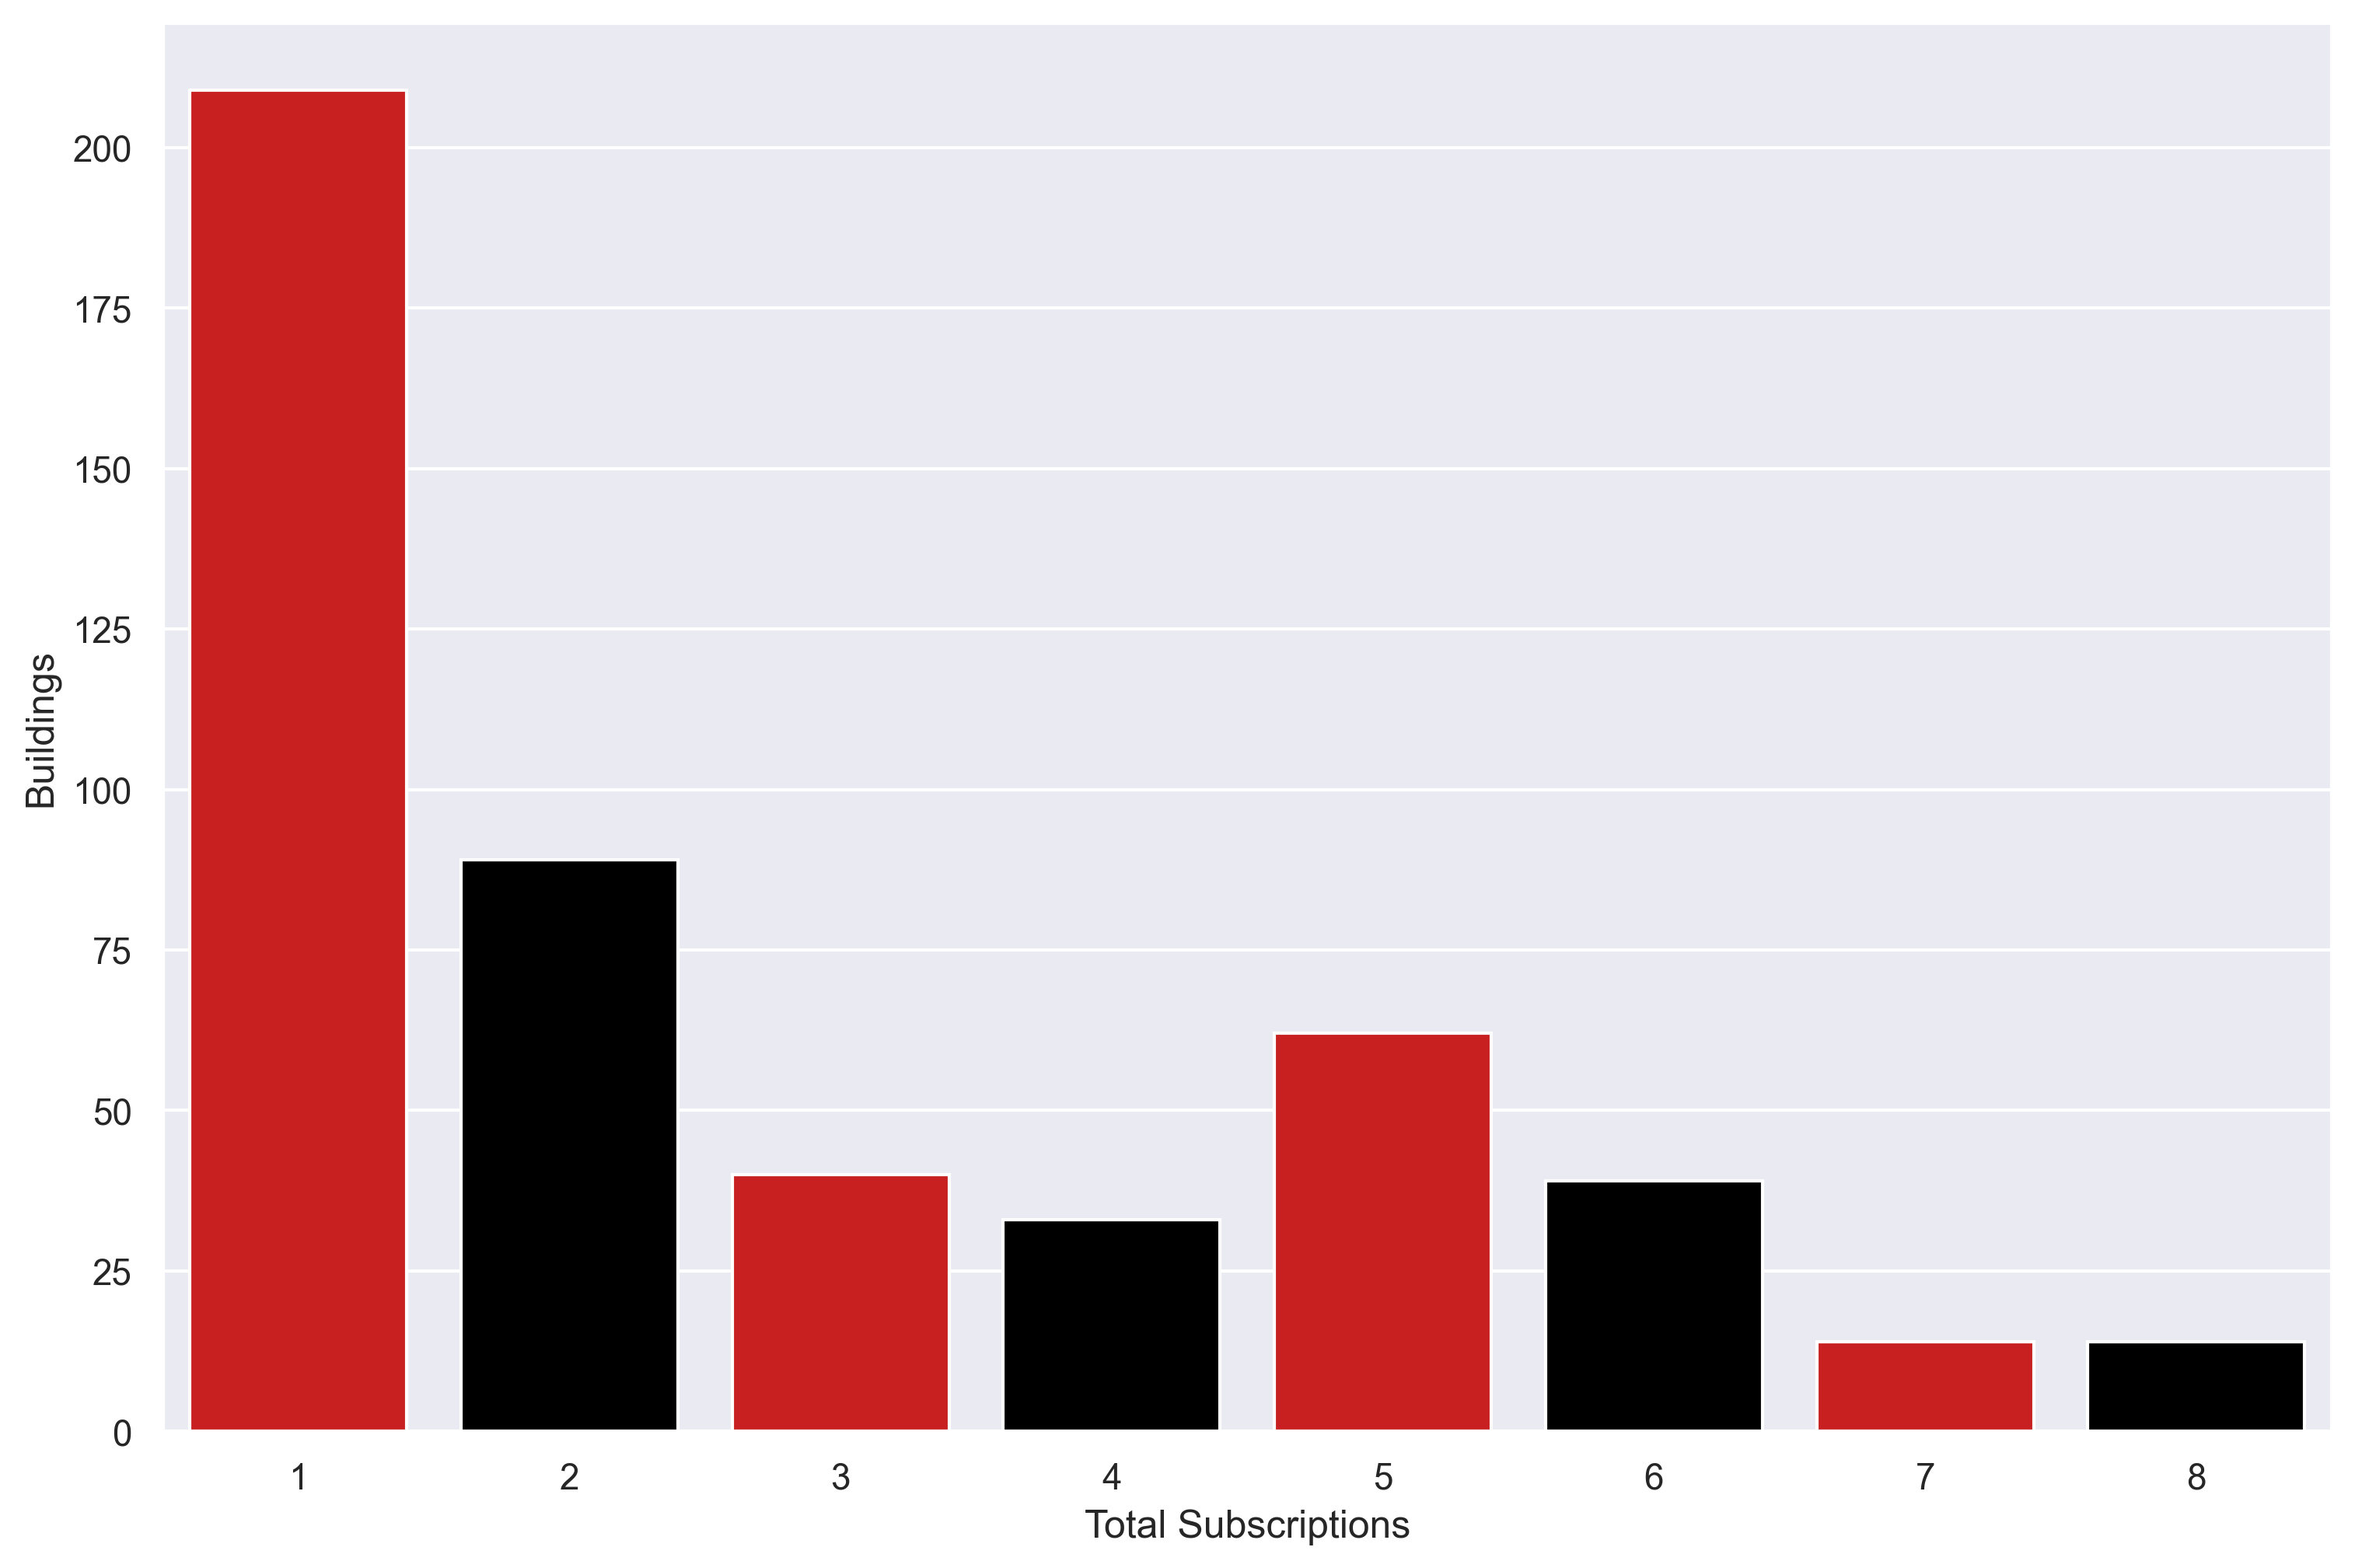

In [201]:
atl_plot = sns.barplot(data=low_by_subs, x='Total Subscriptions',
					   y='Buildings', palette=['#e40404', 'black'])

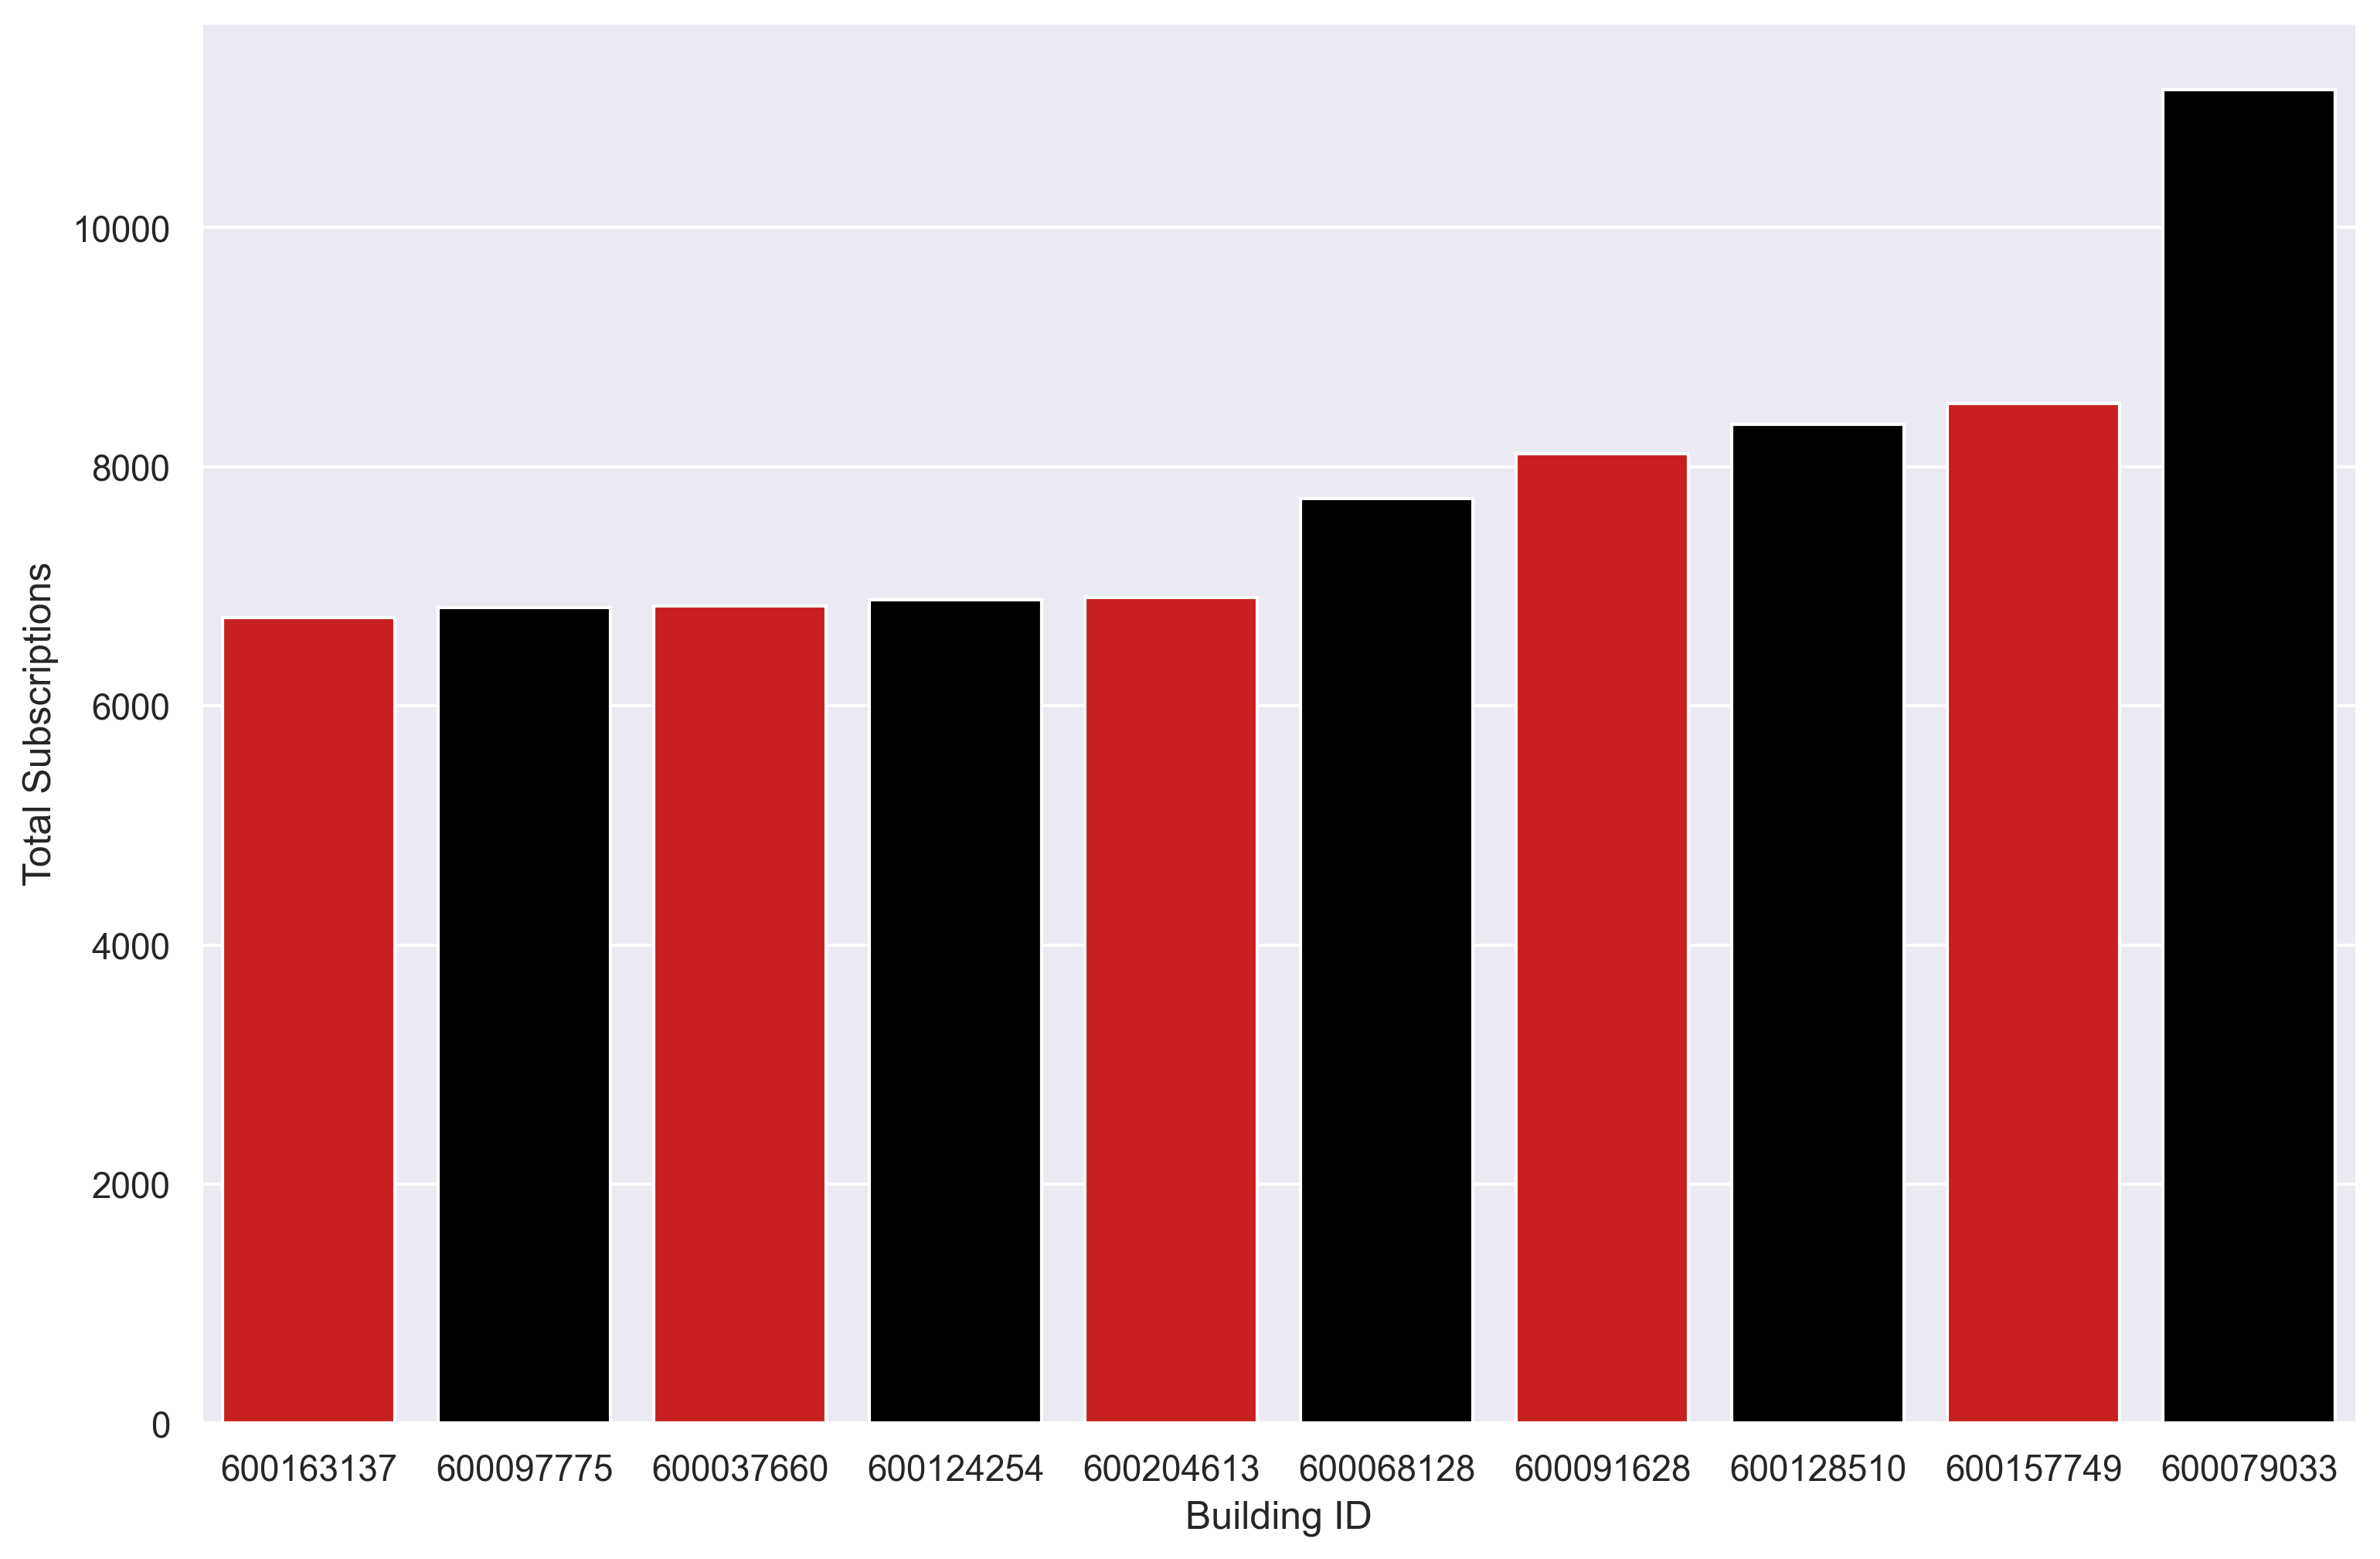

In [202]:
ath_plot = sns.barplot(data=all_time_high, x='Building ID',
					   y='Total Subscriptions', palette=['#e40404', 'black'], order=all_time_high['Building ID'])

### Top 100 Highest and Lowest All Time

In [203]:
highest_buildings_list = all_time_low.iloc[:100]['Building ID'].unique()
lowest_buildings_list = all_time_low.iloc[-85:]['Building ID'].unique()

In [204]:
highest_ts = year_agg_sorted[year_agg_sorted['building_id'].isin(highest_buildings_list)].reset_index()
highest_ts.drop(columns='index', inplace=True)
lowest_ts = year_agg_sorted[year_agg_sorted['building_id'].isin(lowest_buildings_list)].reset_index()
lowest_ts.drop(columns='index', inplace=True)

In [205]:
# Data sizes are comparable
print(f'High Performer Data: {len(highest_ts)}, Low Performer Data: {len(lowest_ts)}')

High Performer Data: 100, Low Performer Data: 105


# Common qualities between these low and high-performing groups

In [206]:
highest_buildings = buildings[buildings['building_id'].isin(highest_buildings_list)]
highest_buildings.head()

,building_id,mailing_state,enrollment,b_indicator_charter,b_indicator_catholic,b_indicator_private,b_indicator_public,reading_performance_grd_3_pct,reading_performance_grd_4_pct,reading_performance_grd_5_pct,reading_performance_grd_6_pct,reading_performance_grd_7_pct,reading_performance_grd_8_pct,b_pct_aa,b_pct_as,b_pct_wa,b_pct_ha,b_pct_t1,b_census_hhi,b_census_urbanicity
570,600045210,fl,501,0,0,0,1,64.0,80.0,55.0,0.0,0.0,0.0,36.0,11.0,28.0,25.0,60.0,38297.0,suburban
970,600058673,la,216,0,0,0,1,56.0,32.0,27.0,35.0,0.0,0.0,6.0,0.0,94.0,0.0,72.0,40025.0,rural
975,600059208,la,167,0,0,0,1,28.0,16.0,18.0,0.0,0.0,0.0,91.0,1.0,8.0,1.0,90.0,28333.0,rural
1240,600060560,md,651,0,0,0,1,79.0,70.0,0.0,0.0,0.0,0.0,9.0,8.0,74.0,8.0,14.0,61912.0,urban
2211,600086969,ok,240,0,0,0,1,54.0,42.0,38.0,0.0,0.0,0.0,0.0,0.0,43.0,4.0,35.0,30654.0,rural


In [207]:
highest_buildings.describe()

,building_id,enrollment,b_indicator_charter,b_indicator_catholic,b_indicator_private,b_indicator_public,reading_performance_grd_3_pct,reading_performance_grd_4_pct,reading_performance_grd_5_pct,reading_performance_grd_6_pct,reading_performance_grd_7_pct,reading_performance_grd_8_pct,b_pct_aa,b_pct_as,b_pct_wa,b_pct_ha,b_pct_t1,b_census_hhi
count,1.000000e+02,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000
mean,6.037305e+08,481.610000,0.100000,0.01,0.030000,0.860000,27.990000,27.520000,25.630000,4.27000,1.980000,1.060000,21.740000,1.900000,28.75000,40.42000,66.200000,45826.350000
std,9.022524e+06,208.465916,0.301511,0.10,0.171447,0.348735,21.500996,20.943638,21.952499,14.10341,11.951062,8.032535,28.829565,4.018895,30.63911,33.16082,28.040375,16212.376793
min,6.000320e+08,60.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,15258.000000
25%,6.000608e+08,321.500000,0.000000,0.00,0.000000,1.000000,6.750000,12.500000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,4.00000,8.00000,54.750000,34399.000000
50%,6.000975e+08,491.000000,0.000000,0.00,0.000000,1.000000,29.000000,27.500000,27.500000,0.00000,0.000000,0.000000,8.500000,1.000000,17.00000,39.50000,73.500000,42938.000000
75%,6.001288e+08,629.000000,0.000000,0.00,0.000000,1.000000,43.000000,43.000000,39.250000,0.00000,0.000000,0.000000,30.750000,2.000000,43.00000,69.25000,89.000000,53325.500000
max,6.370623e+08,1171.000000,1.000000,1.00,1.000000,1.000000,79.000000,80.000000,73.000000,90.00000,92.000000,74.000000,99.000000,24.000000,99.00000,100.00000,100.000000,98524.000000


In [208]:
highest_buildings['mailing_state'].value_counts()[:5]

tx    35
ca     9
fl     5
in     5
md     4
Name: mailing_state, dtype: int64

In [209]:
highest_buildings['b_census_urbanicity'].value_counts(normalize=True)*100

rural       51.0
suburban    28.0
urban       21.0
Name: b_census_urbanicity, dtype: float64

In [210]:
lowest_buildings = buildings[buildings['building_id'].isin(lowest_buildings_list)]
lowest_buildings.head()

,building_id,mailing_state,enrollment,b_indicator_charter,b_indicator_catholic,b_indicator_private,b_indicator_public,reading_performance_grd_3_pct,reading_performance_grd_4_pct,reading_performance_grd_5_pct,reading_performance_grd_6_pct,reading_performance_grd_7_pct,reading_performance_grd_8_pct,b_pct_aa,b_pct_as,b_pct_wa,b_pct_ha,b_pct_t1,b_census_hhi,b_census_urbanicity
160,600035149,ca,560,0,0,0,1,28.0,15.0,34.0,0.0,0.0,0.0,7.0,5.0,15.0,71.0,87.0,39291.0,rural
1542,600056054,ks,361,0,0,0,1,58.0,62.0,0.0,0.0,0.0,0.0,1.0,0.0,87.0,10.0,23.0,67219.0,rural
1817,600073867,nj,573,0,0,0,1,21.0,39.0,23.0,0.0,0.0,0.0,77.0,1.0,1.0,21.0,0.0,37485.0,urban
2950,600107801,wy,84,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48161.0,rural
3926,600073552,nj,700,0,0,0,1,79.0,83.0,86.0,0.0,0.0,0.0,6.0,84.0,4.0,4.0,9.0,112073.0,suburban


In [211]:
lowest_buildings.describe()

,building_id,enrollment,b_indicator_charter,b_indicator_catholic,b_indicator_private,b_indicator_public,reading_performance_grd_3_pct,reading_performance_grd_4_pct,reading_performance_grd_5_pct,reading_performance_grd_6_pct,reading_performance_grd_7_pct,reading_performance_grd_8_pct,b_pct_aa,b_pct_as,b_pct_wa,b_pct_ha,b_pct_t1,b_census_hhi
count,8.300000e+01,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.0,83.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,6.035893e+08,429.265060,0.036145,0.024096,0.120482,0.819277,32.015061,30.585906,31.134992,4.734940,0.0,0.0,16.265060,2.771084,38.650602,27.012048,52.578313,52070.524096
std,9.904008e+06,236.283526,0.187784,0.154281,0.327503,0.387128,26.979553,25.919210,29.719819,14.665443,0.0,0.0,25.725134,9.870287,35.136818,29.596677,33.242318,22099.118152
min,6.000319e+08,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,20951.000000
25%,6.000677e+08,226.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,3.000000,3.500000,27.500000,36133.000000
50%,6.000981e+08,466.000000,0.000000,0.000000,0.000000,1.000000,32.000000,34.000000,32.000000,0.000000,0.0,0.0,4.000000,1.000000,32.000000,13.000000,52.000000,48111.000000
75%,6.001575e+08,609.000000,0.000000,0.000000,0.000000,1.000000,52.500000,45.000000,54.000000,0.000000,0.0,0.0,14.000000,2.000000,68.000000,45.500000,82.000000,59162.500000
max,6.441087e+08,1004.000000,1.000000,1.000000,1.000000,1.000000,88.000000,90.000000,93.000000,67.000000,0.0,0.0,99.000000,84.000000,100.000000,98.000000,100.000000,149053.000000


In [212]:
lowest_buildings['mailing_state'].value_counts()[:5]

tx    16
ca     8
fl     7
ga     6
wa     6
Name: mailing_state, dtype: int64

In [213]:
lowest_buildings['b_census_urbanicity'].value_counts(normalize=True)*100

rural       46.987952
suburban    43.373494
urban        9.638554
Name: b_census_urbanicity, dtype: float64